In [ ]:
import sys

sys.path.append("../bright_objects_masks")
import call_dc2
import warnings

warnings.filterwarnings("ignore")

In this notebook, we open DC2 catalogs using 1) Predefined cuts 2) Custom cuts. Then, we see how to open separatly galaxies and stars. At the end we show how to bin stars catalog in bins of magnitude.

## I) Open a catalog using 'basic quality cuts'

### 1) Predefined cuts

In [2]:
openDC2 = call_dc2.OpenDC2(
    name="dc2_object_run2.2i_dr6_v2_with_addons_v2"
)  # It is the same catalog by default

In [ ]:
DC2_catalog = openDC2.open_cat(tract_list=[3830])

### 2) Custom 'quality cuts'

Arguments :  
-- quantities = select what quantities you want to read from DC2 catalog.  
-- conditions = 'Basic_quality cuts', if None : select predefined cuts.  
-- tract_list = Select which tract(s) to open.  

In [4]:
conditions = [
    "detect_isPrimary==True",
    "modelfit_CModel_flag_badCentroid==False",
    "base_SdssCentroid_flag==False",
    "base_PixelFlags_flag_edge==False",
]

In [ ]:
DC2_catalog = openDC2.open_cat(
    quantities=["ra", "dec", "mag_i_cModel"],
    conditions=conditions,
    tract_list=[3830],
)

## II) Select objects to read (galaxies or stars)

### 1) Galaxies

Lets say you want to get galaxies from tract 3830 with 'basic quality cuts'.

In [ ]:
galaxies_3830 = openDC2.galaxies(
    quantities=["ra", "dec", "mag_i_cModel"],
    conditions=None,
    conditions1=["extendedness==1", "mag_i_cModel>17", "mag_i_cModel<25.3"],
    tract_list=[3830],
)

In [ ]:
display(galaxies_3830[:10])

Now you want the galaxies from this tract but with the neighbouring tracts' galaxies too (it is usefull when we calculate the critical radius).  
Note : By default, quantities = ['ra','dec','mag_i_cModel'], conditions=None, conditions1 = ["extendedness==1", "mag_i_cModel>17", "mag_i_cModel<25.3"], tract_list = None.  
conditions = None --> Basic quality cuts and tract_list = None --> Full catalog read.

In [ ]:
galaxies_3830_nghb = openDC2.galaxies_with_neighbours_tracts(tract_list=3830)

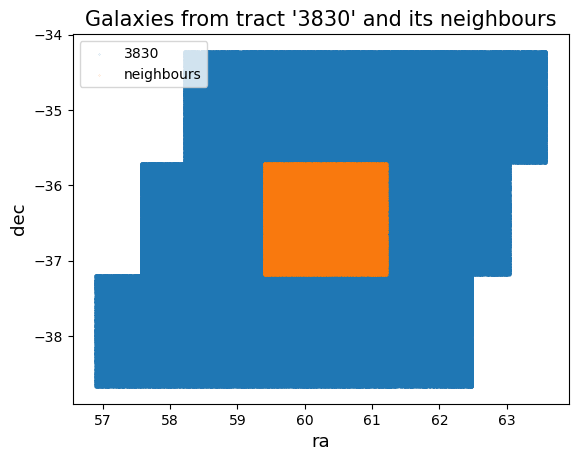

In [9]:
import matplotlib.pyplot as plt

plt.scatter(galaxies_3830_nghb["ra"], galaxies_3830_nghb["dec"], s=0.01, label="3830")
plt.scatter(galaxies_3830["ra"], galaxies_3830["dec"], s=0.01, label="neighbours")
plt.title("Galaxies from tract '3830' and its neighbours", fontsize=15)
plt.xlabel("ra", fontsize=13)
plt.ylabel("dec", fontsize=13)
plt.legend()

### 2) Stars

Get stars on the same tract, arguments are the same except conditions1 = ["extendedness==0"]

In [ ]:
stars_3830 = openDC2.stars(tract_list=3830)

Bin those stars in magnitude bins.  
By default, bins in i band magnitude and bins are [0-17,17-18,18-20,20-22,22-24].

In [11]:
stars_3830_binned_1 = openDC2.bin_cat(stars_3830)  # Basic way to do it
stars_3830_binned_2 = openDC2.bin_cat(
    stars_3830, quantities="mag_i_cModel", bins=[0, 17, 18, 19, 20, 23, 25]
)  # different customizable config

In [ ]:
stars_3830_binned_2